## **Cost Prediction for logistic company with ANN**

The main aim is to predict the cost of a trip of a logistic company based on various features

# Main steps
1.   Data exploration
2.   Feature engineering
3.   Handling missing values
5.   Handling outliers
6.   Data normalization
7.   ML model building
8.   Model deployment






















In [2]:
#library to use KerasClassifier
!pip install scikeras

  Obtaining dependency information for scikit-learn>=1.0.0 from https://files.pythonhosted.org/packages/33/cb/0e41fad5b30fd66925e47952ddc720d078bdfd8397584a4873ec1cf590ca/scikit_learn-1.3.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata
Using cached scikit_learn-1.3.0-cp38-cp38-macosx_10_9_x86_64.whl (10.1 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [1]:
#import of the libraries needed for the project
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import linear_model, preprocessing, feature_selection
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [2]:
#import of the train data
train = pd.read_csv("https://raw.githubusercontent.com/priyankaa-k/Databases1/main/Regression_train.csv")
train.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


# **Data exploration**

In [5]:
#Data exploration
print("shape of the Original data",train.shape)

shape of the Original data (38999, 12)


In [6]:
#Describtion of the data
train.describe()

,distance,weight,cost
count,38999.000000,38999.000000,38999.000000
mean,2004.061643,42.293033,80.972210
std,728.996843,75.473752,180.715055
min,400.000000,1.000000,5.000000
25%,1400.000000,13.000000,38.768742
50%,2000.000000,25.000000,46.468476
75%,2600.000000,39.000000,70.239797
max,3600.000000,500.000000,2019.734797


In [7]:
#checking the Dtype of the features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


# Data preprocessing

Feature engineering

In [3]:
#Function to feature engineer the date attribute by separting the date value into data,month and year
def feature_engg(df):
  #As date is object type first changing its datatype to datetime
  df['date']=pd.to_datetime(df['date'])
  #creating new feature Trip_date which will have all the dates
  df['Trip_date'] = df['date'].dt.day
   #creating new feature Trip_year which will have all the years
  df['Trip_year'] = pd.DatetimeIndex(df.date).year
  #creating new feature Trip_month which will have all the months
  df['Trip_month'] = pd.DatetimeIndex(df.date).month
  #creating new feature Trip_day which will have all the days
  df['Trip_day'] =  df['date'].dt.day_name()
  return df

In [4]:
#Applying feature_engg function to train DF
feature_engg(train)
train.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,Trip_date,Trip_year,Trip_month,Trip_day
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152,6,2017,9,Wednesday
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649,21,2017,10,Saturday
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939,15,2017,7,Saturday
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087,22,2017,10,Sunday
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777,11,2019,12,Wednesday


## Missing values

Visualizing missing values

In [10]:
#Checking for count of null values
train.isnull().sum()

trip                       0
date                       0
dayPart                    0
exWeatherTag           34117
originLocation             0
destinationLocation        0
distance                   0
type                   35251
weight                     0
packageType            36499
carrier                    0
cost                       0
Trip_date                  0
Trip_year                  0
Trip_month                 0
Trip_day                   0
dtype: int64

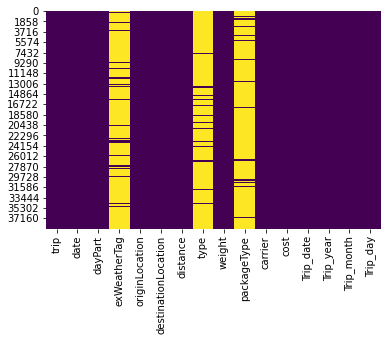

In [11]:
#Heat map which highlights missing values with yellow color in train df.
sns.heatmap(train.isnull(),  cmap='viridis', cbar=False)

# Show the plot
plt.show()

The above heat map shows the features exWheatherTag, type, package_type has a lot of missing values.

Let's plot these features with Cost to visualize the realation

In [12]:
## make the list of features which has missing values
features_with_na= [features for features in train.columns if train[features].isnull().sum()>1]


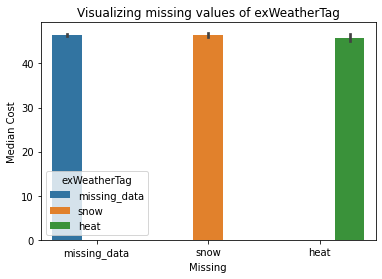

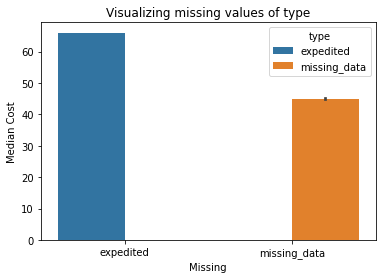

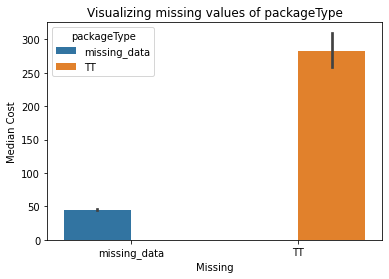

In [13]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["TF_CPP_MIN_LOG_LEVEL"]="5"
for feature in features_with_na:
    train_copy = train.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    train_copy[feature] = np.where(train_copy[feature].isnull(), 'missing_data',train_copy[feature] )

    # let's calculate the mean cost where the information is missing or present
    ax = sns.barplot(x=feature, y='cost', data=train_copy, estimator=np.median, hue=feature)

    ax.set_title('Visualizing missing values of '+feature)
    ax.set_xlabel('Missing')
    ax.set_ylabel('Median Cost')

    plt.show()

Here With  the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the further section. However we can observe that feature pacakageType has less relation with cost. So we can drop the feature

Handling missing values

In [5]:
def handling_missing_values(df):
  #Three feature values have null values

  def replace_weather(row):
      #Handling Null values of exWeatherTag using Trip_month feature according to canadian whether
      #assigning whether values to the months
      month_to_weather = {
          1: 'snow',      # January (winter)
          2: 'snow',      # February (winter)
          3: 'spring',    # March (spring)
          4: 'spring',    # April (spring)
          5: 'spring',    # May (spring)
          6: 'hot',       # June (summer)
          7: 'hot',       # July (summer)
          8: 'hot',       # August (summer)
          9: 'hot',       # September (summer)
          10: 'snow',     # October (winter)
          11: 'snow',     # November (winter)
          12: 'snow'      # December (winter)
      }

      # Replace the weather values based on the month_to_weather mapping
      df['exWeatherTag'] = df['Trip_month'].map(month_to_weather)
      return df

  # Apply the function to fill NaN values in exWeatherTag
  df = replace_weather(df)

  #creating dummies for type feature
  df['type'] = pd.get_dummies(df['type'], prefix='type')



Before handling nan values for exWeatherTag


Text(0.5, 1.0, 'Visualizing exWhetherTag with Trip_month')

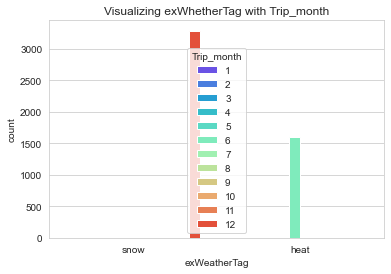

In [6]:
#Visualizing "exWeatherTag" feature missing values using "Trip_month" feature
print("Before handling nan values for exWeatherTag")
sns.set_style('whitegrid')
sns.countplot(x='exWeatherTag',hue='Trip_month',data=train,palette='rainbow')
# Set labels on the right side
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
plt.title("Visualizing exWhetherTag with Trip_month" )

In [7]:
#calling handling missing value function to handle the missing value in the data
handling_missing_values(train)

In [8]:
#check if nan values are replaced
train.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,Trip_date,Trip_year,Trip_month,Trip_day
0,t52712528,2017-09-06,night,hot,S4,D7,2200,1,50,NaN,D,68.413152,6,2017,9,Wednesday
1,t29859381,2017-10-21,night,snow,S8,D1,1800,0,12,NaN,B,36.450649,21,2017,10,Saturday
2,t25702332,2017-07-15,night,hot,S9,D5,2800,0,1,NaN,B,9.057939,15,2017,7,Saturday
3,t27713405,2017-10-22,day,snow,S9,D7,3200,0,50,NaN,C,57.320087,22,2017,10,Sunday
4,t49439220,2019-12-11,day,snow,S9,D1,2000,0,43,NaN,B,77.263777,11,2019,12,Wednesday


In [10]:
train.isnull().sum()

trip                       0
date                       0
dayPart                    0
exWeatherTag               0
originLocation             0
destinationLocation        0
distance                   0
type                       0
weight                     0
packageType            36499
carrier                    0
cost                       0
Trip_date                  0
Trip_year                  0
Trip_month                 0
Trip_day                   0
dtype: int64

After handling nan values for exWeatherTag


Text(0.5, 1.0, 'Visualizing exWhetherTag with Trip_month')

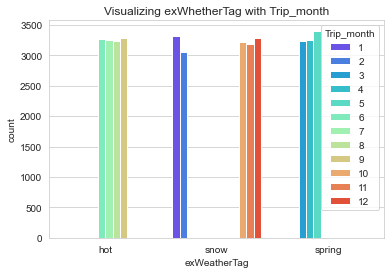

In [9]:
print("After handling nan values for exWeatherTag")
sns.set_style('whitegrid')
sns.countplot(x='exWeatherTag',hue='Trip_month',data=train,palette='rainbow')
plt.title("Visualizing exWhetherTag with Trip_month" )

Handling Outliers

In [19]:
#numerical columns
col_numerical = ['distance','weight','cost']

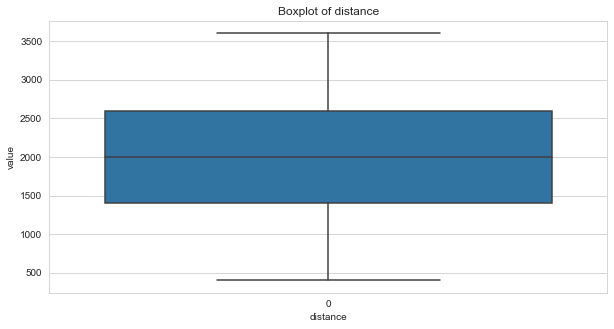

None


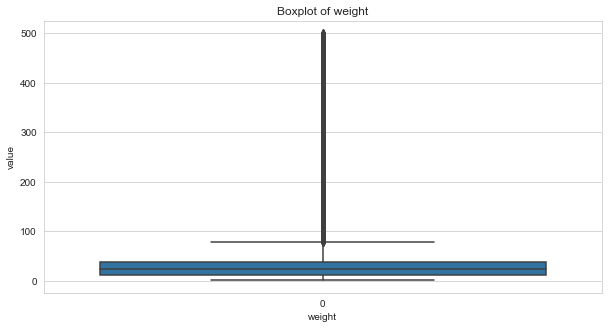

None


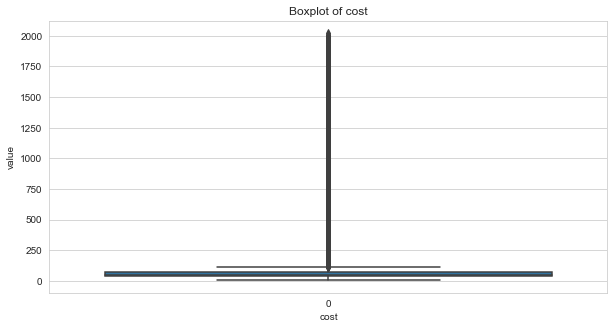

None
visualizing outliers before handling them None


In [20]:
#function to visualize outliers
def visualize_outliers(df):
  #visualizing the outliers using box ploat
  columns_to_plot = col_numerical
  # Loop through each column and plot the box plot
  for i, col in enumerate(columns_to_plot):
    plt.figure(figsize=(10,5))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('value')
    print(plt.show())

#Applying function to train df
print("visualizing outliers before handling them", visualize_outliers(train))

From the above plots weight feature has soo many outliers as well as cost.

In [21]:
#numerical columns
col_numerical = ['distance','weight']
def outliers(df):
  #visualizing and handling outliers for numerical features

  def visualize_outliers(df):
    #visualizing the outliers using bocx ploat
    columns_to_plot = col_numerical
    # Loop through each column and plot the box plot
    for i, col in enumerate(columns_to_plot):
      plt.figure(figsize=(10,5))
      plt.subplots_adjust(wspace=0.5, hspace=0.5)
      sns.boxplot(data=df[col])
      plt.title(f'Boxplot of {col}')
      plt.xlabel(col_numerical)
      plt.ylabel('Value')
      print(plt.show())

  print("visualizing outliers before handling them", visualize_outliers(df))

  def handle_outliers_in_dataframe(df):
    #handling outliers using imputation of mean values

    mean_value = df.mean()
    # Replace outliers with the mean value for each column
    df_handled = df.apply(lambda col: np.where(
        np.abs(col - col.mean()) > 1.5 * (col.quantile(0.75) - col.quantile(0.25)),
        mean_value[col.name], col)
    )
    return df_handled

  df[col_numerical] = handle_outliers_in_dataframe(df[col_numerical])

  print("visualizing outliers after handling them", visualize_outliers(df))



In [22]:
#Applying outlier function on train df
# outliers(train)

Reason for not handling the above code which apply handling outliers function to train is cost and weight has hight corelation and they are skewed in same manner so outliers for weight is also contributing to predict cost

Dropping the unwanted columns

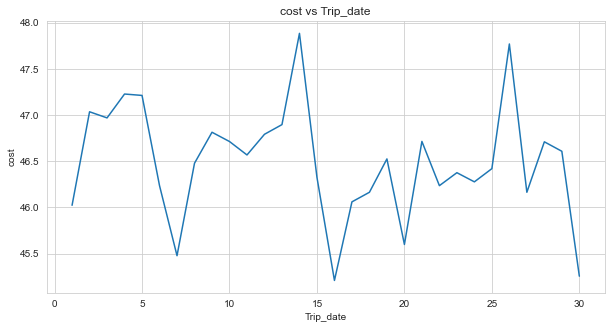

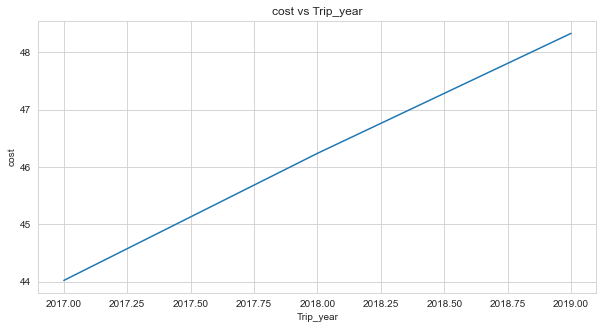

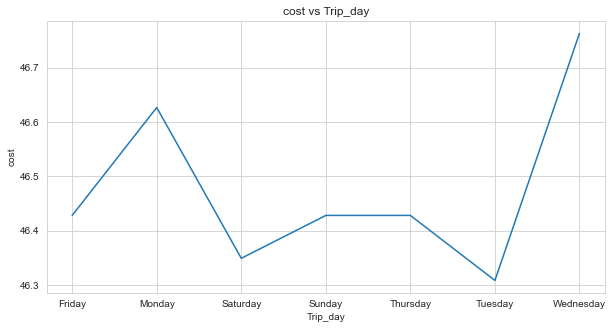

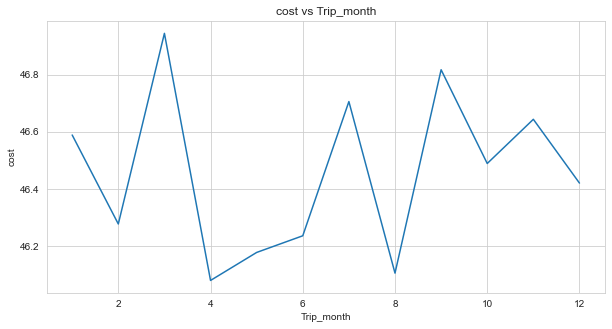

In [23]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the cost
date_cols = ['Trip_date','Trip_year','Trip_day','Trip_month']
for col in date_cols:
  plt.figure(figsize=(10,5))
  train_copy.groupby(col)['cost'].median().plot()
  plt.xlabel(col)
  plt.ylabel('cost')
  plt.title("cost vs "+col)
  plt.show()

The above plots shows the relation between Traget feature cost and data feartures.


*   Trip_date and cost has various relation, during the date 5,15,30 the cost value is decreased while on other dates it got flactuations but mostly the cost value is high.
*   Trip_year and cost has linear relation, Cost value increased consistently through the years.

*   During the weekends in Trip_day feature cost value is low while on weekdays like wednesday cost value is very high
*   Trip_month has flactuating rate of cost value, between the months sepetember to march mostly the cost value is high which has snow whether. During Hot whether months like April cost value is very low. So the feature exWhetheTag and Trip_month basically gives same insights. So we can drop this column.






In [24]:
# function to drop column from given dataset
def dropSelectedColumns(df, columns):
    for column in columns:
        df = df.drop(column, axis = 1)
    return df

In [25]:
#listing the selected features to drop
drop_columns = ['trip','date','packageType','Trip_date']
#Applying dropSelectedColumns to train df
train = dropSelectedColumns(train, drop_columns)
train.head()

,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,carrier,cost,Trip_year,Trip_month,Trip_day
0,night,hot,S4,D7,2200,1,50,D,68.413152,2017,9,Wednesday
1,night,snow,S8,D1,1800,0,12,B,36.450649,2017,10,Saturday
2,night,hot,S9,D5,2800,0,1,B,9.057939,2017,7,Saturday
3,day,snow,S9,D7,3200,0,50,C,57.320087,2017,10,Sunday
4,day,snow,S9,D1,2000,0,43,B,77.263777,2019,12,Wednesday


In [26]:
# Define the target column ,categorical,numerical and predictors columns
TARGET = "cost"
columns_predictors = [col for col in train.columns if col not in [TARGET]]
columns_categorical = ['dayPart',  'destinationLocation', 'originLocation','carrier','exWeatherTag','Trip_year', 'Trip_day','Trip_month','type']
columns_numerical = [col for col in columns_predictors  if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: cost
columns_predictors: ['dayPart', 'exWeatherTag', 'originLocation', 'destinationLocation', 'distance', 'type', 'weight', 'carrier', 'Trip_year', 'Trip_month', 'Trip_day']
columns_categorical: ['dayPart', 'destinationLocation', 'originLocation', 'carrier', 'exWeatherTag', 'Trip_year', 'Trip_day', 'Trip_month', 'type']
columns_numerical: ['distance', 'weight']


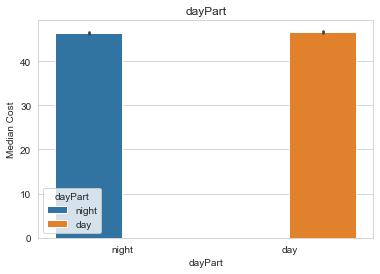

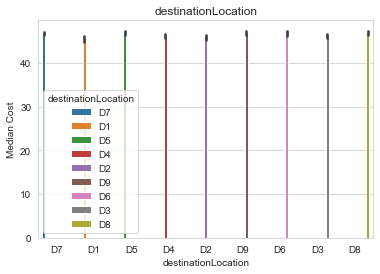

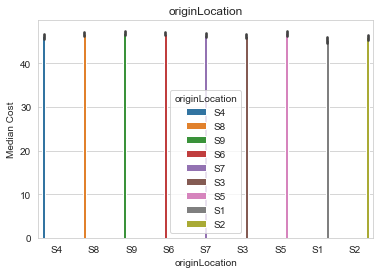

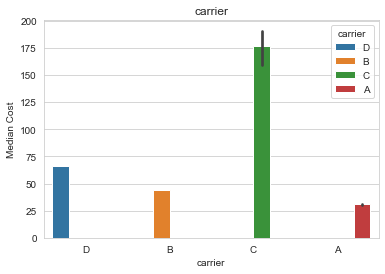

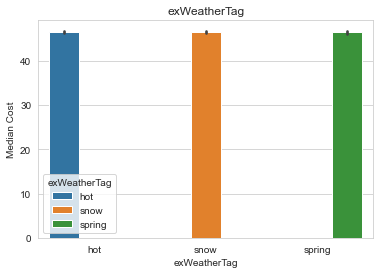

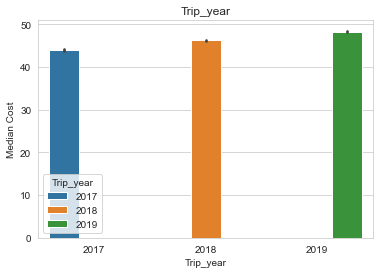

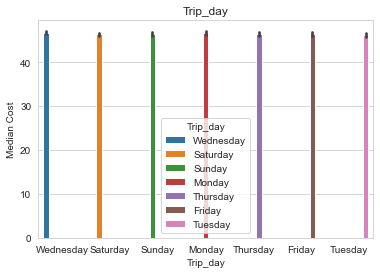

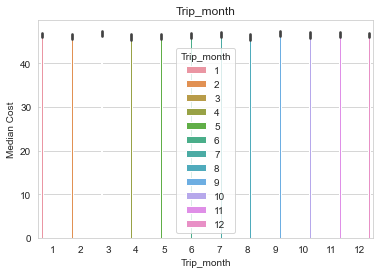

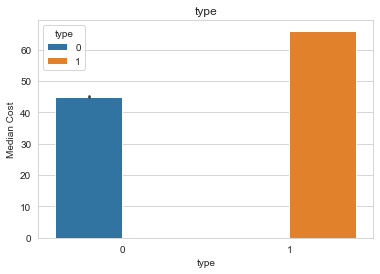

In [65]:
## Lets Find the realtionship between categorical features and cost

for col in columns_categorical:
    train_copy=train.copy()
#     plt.figure(figsize=(15,5))
     # Create a bar plot of the median cost grouped by the categorical column and colored by the column
    ax = sns.barplot(x=col, y='cost', data=train_copy, estimator=np.median, hue=col)

    # Set the labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Median Cost')
    ax.set_title(col)

    # Show the plot
    plt.show()

The  relationship between categorical features  and cost is as follows:


*   All the values in features day_part,Original_location,Destination_location,exWhetherTag, Trip_year, Trip_day, Trip_date are contributing high to the cost
*   Expideted type are more with high cost values while the non-expideted type has fair cost value.
*   The Carrier C has contributing more for cost value while other carriers has cost values between 0-60.



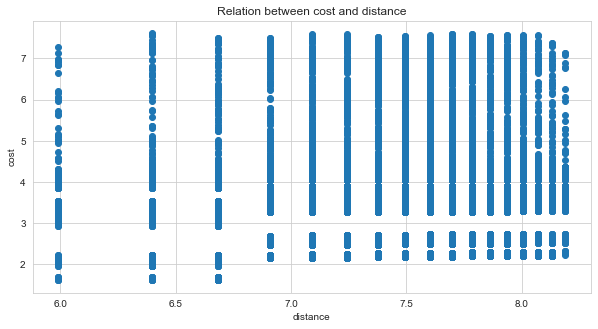

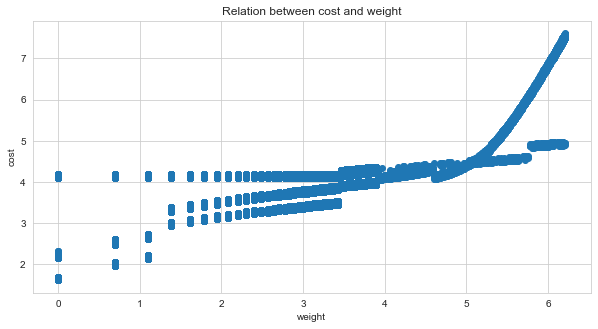

In [28]:
## We will be using logarithmic transformation


for col in columns_numerical:
    train_copy=train.copy()
    if 0 in train_copy[col].unique():
        pass
    else:
        train_copy[col]=np.log(train_copy[col])
        train_copy['cost']=np.log(train_copy['cost'])
        plt.figure(figsize=(10,5))
        plt.scatter(train_copy[col],train_copy['cost'])
        plt.xlabel(col)
        plt.ylabel('cost')
        plt.title('Relation between cost and '+col)
        plt.show()


1.  The above plot shows that relation between cost and distance is not linear.
2.  The weight and cost are correlated and up to weight value 5 cost value is consistent and above that weight cost value started increasing.



In [29]:
#Spliting data into dependent and independent varaiables
X = train[columns_predictors]
y = train[TARGET]
# split our dataset into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.01)

In [30]:
#X_train and y_train shape before one hot encoding and normilazation
print('X_train and y_train shape before one hot encoding and normilazation')
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_validation.shape: {X_validation.shape}")
print(f"y_validation.shape: {y_validation.shape}")

X_train and y_train shape before one hot encoding and normilazation
X_train.shape: (38609, 11)
y_train.shape: (38609,)
X_validation.shape: (390, 11)
y_validation.shape: (390,)


# Data normalization and Building Data Pipeline using Feature Union

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(columns_numerical)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(columns_categorical)),('onehot', OneHotEncoder())
    ])


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),

    ])

X_train_transform = full_pipeline.fit_transform(X_train)
X_validation_transform =  full_pipeline.fit_transform(X_validation)


In [32]:
#Shape after one hot encoding and normalisation
print("Shape after one hot encoding and normalisation")
print(f"X_train transformed.shape: {X_train_transform.shape}")
print(f"X_validation transformed.shape: {X_validation_transform.shape}")

Shape after one hot encoding and normalisation
X_train transformed.shape: (38609, 53)
X_validation transformed.shape: (390, 53)


In [33]:
#transforming X_train and X_validation to array
X_train_transform = X_train_transform.toarray()
X_validation_transform = X_validation_transform.toarray()
print(f"X_train transformed.shape: {X_train_transform.shape}")
print(f"X_validation transformed.shape: {X_validation_transform.shape}")

X_train transformed.shape: (38609, 53)
X_validation transformed.shape: (390, 53)


## **ANN Modeling**

### Model 1- Keras Regressor

In [34]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Dropout
from tensorflow.keras import optimizers

In [35]:
# Checking the tensorflow libraries
print(tf.__version__)

2.13.0


In [36]:
Create_model = Sequential()

#Input Layer
Create_model.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train_transform.shape[1]))

#Hidden Layer
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(128,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
Create_model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

In [37]:
#Compile the network

Create_model.compile(loss = 'MeanSquaredError', optimizer='adam', metrics=['mse','mae'])
Create_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                594       
                                                                 
 dense_1 (Dense)             (None, 512)               6144      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [38]:
#Ploting the model
tf.keras.utils.plot_model(Create_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

#Hyperparameter tunning for kerasregressor
batch_size = [50,75]
epochs = [3,5]
k_folds = 5
Hyp_Model_1 = KerasRegressor(model=Create_model)

param_grid = dict(batch_size=batch_size, epochs = epochs)
randSearch_1 = GridSearchCV(Hyp_Model_1, param_grid, cv=k_folds, scoring='neg_mean_squared_error', error_score="raise", n_jobs=-1, verbose=0)

In [40]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["TF_CPP_MIN_LOG_LEVEL"]="5"
#fiting model
history = randSearch_1.fit(X_train_transform, y_train,verbose=0)

INFO:tensorflow:Assets written to: ram://0d0fa3d3be1a4570b659785fb0e8c4c6/assets


INFO:tensorflow:Assets written to: ram://0d0fa3d3be1a4570b659785fb0e8c4c6/assets


INFO:tensorflow:Assets written to: ram://d826b944a1d94cc397b91ea6f3333d45/assets


INFO:tensorflow:Assets written to: ram://d826b944a1d94cc397b91ea6f3333d45/assets


INFO:tensorflow:Assets written to: ram://2e8c13e58a3b47b9bbaed4142a9a7a6f/assets


INFO:tensorflow:Assets written to: ram://2e8c13e58a3b47b9bbaed4142a9a7a6f/assets


INFO:tensorflow:Assets written to: ram://a9d5ff5e37744c11abe9d3a376c3a377/assets


INFO:tensorflow:Assets written to: ram://a9d5ff5e37744c11abe9d3a376c3a377/assets


INFO:tensorflow:Assets written to: ram://ecfa0a8240d948149ae58bcb7581e081/assets


INFO:tensorflow:Assets written to: ram://ecfa0a8240d948149ae58bcb7581e081/assets


INFO:tensorflow:Assets written to: ram://1a415230dc7847daab736402b0705836/assets


INFO:tensorflow:Assets written to: ram://1a415230dc7847daab736402b0705836/assets


INFO:tensorflow:Assets written to: ram://cff6e827b6ee449a8ec9ad74b7f8f706/assets


INFO:tensorflow:Assets written to: ram://cff6e827b6ee449a8ec9ad74b7f8f706/assets


INFO:tensorflow:Assets written to: ram://b21b0bb7967041589b069dfaefc86c6e/assets


INFO:tensorflow:Assets written to: ram://b21b0bb7967041589b069dfaefc86c6e/assets


INFO:tensorflow:Assets written to: ram://1565ab1203304490a634afa91ec182c2/assets


INFO:tensorflow:Assets written to: ram://1565ab1203304490a634afa91ec182c2/assets


INFO:tensorflow:Assets written to: ram://0059421177d945da99b41049c6ad6fe9/assets


INFO:tensorflow:Assets written to: ram://0059421177d945da99b41049c6ad6fe9/assets


INFO:tensorflow:Assets written to: ram://43455def33a84fc590418514b9b3627e/assets


INFO:tensorflow:Assets written to: ram://43455def33a84fc590418514b9b3627e/assets


INFO:tensorflow:Assets written to: ram://65854c380dd14559aa1a559e8f7559c8/assets


INFO:tensorflow:Assets written to: ram://65854c380dd14559aa1a559e8f7559c8/assets


INFO:tensorflow:Assets written to: ram://10a1615658114488b543fe15ab15d9c8/assets


INFO:tensorflow:Assets written to: ram://10a1615658114488b543fe15ab15d9c8/assets


INFO:tensorflow:Assets written to: ram://815f76561b6f4e3b87712e9bacf3de54/assets


INFO:tensorflow:Assets written to: ram://815f76561b6f4e3b87712e9bacf3de54/assets


INFO:tensorflow:Assets written to: ram://b2b6bfaaba93481e9849c9c8cefc0274/assets


INFO:tensorflow:Assets written to: ram://b2b6bfaaba93481e9849c9c8cefc0274/assets


INFO:tensorflow:Assets written to: ram://555f2809429b4ce98bab0d2941847210/assets


INFO:tensorflow:Assets written to: ram://555f2809429b4ce98bab0d2941847210/assets


INFO:tensorflow:Assets written to: ram://a3bad0cbe01341c29873841ae7efc68d/assets


INFO:tensorflow:Assets written to: ram://a3bad0cbe01341c29873841ae7efc68d/assets


INFO:tensorflow:Assets written to: ram://9f39baef50ec492db51f60321a6fa11b/assets


INFO:tensorflow:Assets written to: ram://9f39baef50ec492db51f60321a6fa11b/assets


INFO:tensorflow:Assets written to: ram://31f02f91428e4e169074d1a959ac8950/assets


INFO:tensorflow:Assets written to: ram://31f02f91428e4e169074d1a959ac8950/assets


INFO:tensorflow:Assets written to: ram://b47e6f211bd54c3ca18822955626cbba/assets


INFO:tensorflow:Assets written to: ram://b47e6f211bd54c3ca18822955626cbba/assets


INFO:tensorflow:Assets written to: ram://4a4c7192bba74d699d67ad916703f8ad/assets


INFO:tensorflow:Assets written to: ram://4a4c7192bba74d699d67ad916703f8ad/assets


INFO:tensorflow:Assets written to: ram://eec12de36ca241068ef4da78ee7f68ec/assets


INFO:tensorflow:Assets written to: ram://eec12de36ca241068ef4da78ee7f68ec/assets


INFO:tensorflow:Assets written to: ram://8158b8b337f645b48b5a32edeaeca08e/assets


INFO:tensorflow:Assets written to: ram://8158b8b337f645b48b5a32edeaeca08e/assets


INFO:tensorflow:Assets written to: ram://ad8a40ba10be456f908a5cc1b21ea070/assets


INFO:tensorflow:Assets written to: ram://ad8a40ba10be456f908a5cc1b21ea070/assets


INFO:tensorflow:Assets written to: ram://5ffb5fd0b94c42a0ab33b1fc37219063/assets


INFO:tensorflow:Assets written to: ram://5ffb5fd0b94c42a0ab33b1fc37219063/assets


INFO:tensorflow:Assets written to: ram://a10b5bc3d0b84f37b50aa47ccb4978bc/assets


INFO:tensorflow:Assets written to: ram://a10b5bc3d0b84f37b50aa47ccb4978bc/assets


INFO:tensorflow:Assets written to: ram://7c54c3a923144f59b110fda1a6a0bbf0/assets


INFO:tensorflow:Assets written to: ram://7c54c3a923144f59b110fda1a6a0bbf0/assets


INFO:tensorflow:Assets written to: ram://3c6d1979508947d78f75f0f9369ee23d/assets


INFO:tensorflow:Assets written to: ram://3c6d1979508947d78f75f0f9369ee23d/assets


INFO:tensorflow:Assets written to: ram://421514a96fae45418a3e1a9aff7ca1db/assets


INFO:tensorflow:Assets written to: ram://421514a96fae45418a3e1a9aff7ca1db/assets


INFO:tensorflow:Assets written to: ram://8c74de93a56e4e55939dbd75dca7a75c/assets


INFO:tensorflow:Assets written to: ram://8c74de93a56e4e55939dbd75dca7a75c/assets


INFO:tensorflow:Assets written to: ram://4e147463c69341ceb4601071f001a6c7/assets


INFO:tensorflow:Assets written to: ram://4e147463c69341ceb4601071f001a6c7/assets


INFO:tensorflow:Assets written to: ram://8458b95d6ceb4ceeb06199f2f560fbc5/assets


INFO:tensorflow:Assets written to: ram://8458b95d6ceb4ceeb06199f2f560fbc5/assets


INFO:tensorflow:Assets written to: ram://f43212ed06dc45779ed2ad4aa9ae2c56/assets


INFO:tensorflow:Assets written to: ram://f43212ed06dc45779ed2ad4aa9ae2c56/assets


INFO:tensorflow:Assets written to: ram://436ecdd810b4478c9a7933d6f5c0cc0e/assets


INFO:tensorflow:Assets written to: ram://436ecdd810b4478c9a7933d6f5c0cc0e/assets


INFO:tensorflow:Assets written to: ram://8e531b8ccb0e4736898ce70078120191/assets


INFO:tensorflow:Assets written to: ram://8e531b8ccb0e4736898ce70078120191/assets


INFO:tensorflow:Assets written to: ram://2e0498f5c81c426ea9c81822abc659d8/assets


INFO:tensorflow:Assets written to: ram://2e0498f5c81c426ea9c81822abc659d8/assets


INFO:tensorflow:Assets written to: ram://f3bf92248ea246c0ab47ef920411a79c/assets


INFO:tensorflow:Assets written to: ram://f3bf92248ea246c0ab47ef920411a79c/assets


INFO:tensorflow:Assets written to: ram://c99eb56b195346a984dc2b2ea4baa63b/assets


INFO:tensorflow:Assets written to: ram://c99eb56b195346a984dc2b2ea4baa63b/assets


INFO:tensorflow:Assets written to: ram://9c88b0274b934434ab8fe5ac0f33382e/assets


INFO:tensorflow:Assets written to: ram://9c88b0274b934434ab8fe5ac0f33382e/assets


INFO:tensorflow:Assets written to: ram://a2c890a7eac14f229b3e9776a43b7128/assets


INFO:tensorflow:Assets written to: ram://a2c890a7eac14f229b3e9776a43b7128/assets


INFO:tensorflow:Assets written to: ram://3458d08d5dc044ffac38303a4b92a9df/assets


INFO:tensorflow:Assets written to: ram://3458d08d5dc044ffac38303a4b92a9df/assets


INFO:tensorflow:Assets written to: ram://db0b054dcabf42daa09e8b524ce44017/assets


INFO:tensorflow:Assets written to: ram://db0b054dcabf42daa09e8b524ce44017/assets


INFO:tensorflow:Assets written to: ram://f9a691da9adc48abbce5bedb9d99f9ba/assets


INFO:tensorflow:Assets written to: ram://f9a691da9adc48abbce5bedb9d99f9ba/assets


In [41]:
#finding best parameter and best estimator
best_params = randSearch_1.best_params_
best_estimators_model1 = randSearch_1.best_estimator_

print(best_params)
print(best_estimators_model1)

{'batch_size': 75, 'epochs': 5}
KerasRegressor(
	model=<keras.src.engine.sequential.Sequential object at 0x7ff4b50997f0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=75
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
)


In [42]:
#predicting on x_validation
y_val_prediction = best_estimators_model1.predict(X_validation_transform)

6/6 [==============================] - 1s 24ms/step


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

# Calculate mean squared error on training data
KerasRegressor_mse = mean_squared_error(y_val_prediction, y_validation)
print(f'MSE: {KerasRegressor_mse}')

# Calculate root mean squared error on training data
KerasRegressor_rmse = np.sqrt(mean_squared_error(y_val_prediction, y_validation))
print(f'RMSE: {KerasRegressor_rmse}')

# Calculate mean absolute error on training data
KerasRegressor_mae = mean_absolute_error(y_val_prediction, y_validation)
print(f'MAE: {KerasRegressor_mae}')

# Calculate R-squared on training data
KerasRegressor_r2 = r2_score(y_val_prediction, y_validation)
print(f'R-squared: {KerasRegressor_r2}')

# Calculate adjusted R-squared on training data
n = len(y_validation) #  Number of samples
p = X_train_transform.shape[1] #Number of predicted variables
KerasRegressor_adj_r2 = 1 - (1 - KerasRegressor_r2) * (n - 1) / (n - p - 1)
print(f'adjusted R-squared: {KerasRegressor_adj_r2}')


MSE: 15272.03511289524
RMSE: 123.5800757116423
MAE: 23.62836020085426
R-squared: 0.7819069928284158
adjusted R-squared: 0.7475054172924218


Feature importance

In [44]:
weights = Create_model.get_weights()
feature_importance = np.sum(np.abs(weights[0]), axis=1)
feature_importance

array([1.638281 , 1.9860568, 1.7181914, 1.7589409, 1.9616082, 1.6774321,
       1.3341175, 1.7956964, 1.8125561, 1.9702457, 1.6758901, 1.7075301,
       1.9195551, 1.9596431, 1.8028281, 1.7950647, 1.944642 , 2.1631932,
       1.5576382, 2.0660167, 1.7560632, 1.5736532, 1.1752757, 1.1575099,
       1.390413 , 1.7019215, 1.751894 , 1.5550151, 2.3167524, 1.6598563,
       2.436149 , 1.863234 , 1.5904832, 1.7841712, 1.8013697, 1.6696972,
       1.9722662, 1.623615 , 1.184541 , 1.3156114, 1.4326435, 2.1629376,
       1.3005135, 2.0249753, 1.3155534, 2.3509884, 1.9766967, 1.5599192,
       2.181947 , 1.7748222, 1.3812363, 1.3152362, 1.2427105],
      dtype=float32)

Finding the  feature importance of the Neural networks is challenging as it consist of inter-connected layers which makes it difficult to interpret the importance of the individual feature. So we used weight based approach in finding the importance of the feature.

Weight-based methods consider the weights or connections between the neurons in the neural network to estimate feature importance. Features with higher weights contribute more to the final predictions of the model.

###MOdel 2 - Another way to Train Keras Models with L2 and Dropouts

In [45]:
Create_model_2 = Sequential()

#Input Layer
Create_model_2.add(Dense(X_train_transform.shape[1], activation='relu', input_dim = X_train_transform.shape[1]))

#Hidden Layer
Create_model_2.add(Dense(512,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(128,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(32,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
#Output Layer
Create_model_2.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate=0.01)

Create_model_2.compile(loss = 'MeanSquaredError', optimizer=opt, metrics=['mse','mae'])
Create_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 53)                2862      
                                                                 
 dense_9 (Dense)             (None, 512)               27648     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [46]:
from keras.callbacks import EarlyStopping
#intilize values for earlystopping
es = EarlyStopping(monitor='mse', verbose=1, patience=5)

#fitting modek
history2 = Create_model_2.fit(X_train_transform, y_train, batch_size=25, epochs=100, callbacks=[es])

Epoch 1/100
1545/1545 [==============================] - 21s 10ms/step - loss: 23379.6133 - mse: 23343.9531 - mae: 51.3386
Epoch 2/100
1545/1545 [==============================] - 20s 13ms/step - loss: 34454.1680 - mse: 34391.3750 - mae: 60.3978
Epoch 3/100
1545/1545 [==============================] - 17s 11ms/step - loss: 35601.3711 - mse: 35543.7773 - mae: 54.6439
Epoch 4/100
1545/1545 [==============================] - 16s 11ms/step - loss: 34503.1641 - mse: 34454.7461 - mae: 47.1036
Epoch 5/100
1545/1545 [==============================] - 18s 11ms/step - loss: 33805.1602 - mse: 33764.4258 - mae: 45.8682
Epoch 6/100
1545/1545 [==============================] - 15s 9ms/step - loss: 33337.1094 - mse: 33302.9961 - mae: 47.1832
Epoch 6: early stopping


In [47]:
from matplotlib import pyplot

train_acc = Create_model_2.evaluate(X_train_transform, y_train)
test_acc = Create_model_2.evaluate(X_validation_transform, y_validation)

#Predicting on X_validation_transform
y_prediction2 = Create_model_2.predict(X_validation_transform)


13/13 [==============================] - 0s 11ms/step


In [48]:

# Calculate mean squared error on training data
train_mse2 = mean_squared_error(y_prediction2, y_validation)
print(f'MSE: {train_mse2}')

# Calculate root mean squared error on training data
train_rmse2 = np.sqrt(mean_squared_error(y_prediction2, y_validation))
print(f'RMSE: {train_rmse2}')

# Calculate mean absolute error on training data
train_mae2 = mean_absolute_error(y_prediction2, y_validation)
print(f'MAE: {train_mae2}')

# Calculate R-squared on training data
train_r2_2 = r2_score(y_prediction2, y_validation)
print(f'R-squared: {train_r2_2}')

# Calculate adjusted R-squared on training data
n = len(y_validation) #  Number of samples
p = X_train_transform.shape[1] #Number of predicted variables
train_adj_r2_2 = 1 - (1 - train_r2_2) * (n - 1) / (n - p - 1)
print(f'adjusted R-squared: {train_adj_r2_2}')


MSE: 20945.25778539458
RMSE: 144.7247656256336
MAE: 38.281018490115635
R-squared: -359836788778235.44
adjusted R-squared: -416596758436707.25


In [49]:
weights = Create_model_2.get_weights()
feature_importance = np.sum(np.abs(weights[0]), axis=1)
feature_importance

array([11.404973 ,  8.373104 , 17.021011 , 20.448364 , 13.340593 ,
       14.092812 , 11.1912365, 11.956636 , 15.607832 , 15.419306 ,
       14.355254 , 13.555486 , 14.286339 , 11.520291 , 11.151647 ,
       14.165156 , 13.730309 , 12.931172 , 12.174717 , 14.80846  ,
       15.6704445, 12.497427 , 20.628971 , 22.09226  , 17.421583 ,
       24.163534 , 16.112362 , 14.302734 , 18.894411 , 15.941682 ,
       16.215311 , 14.977611 , 13.56035  , 15.605399 , 14.13054  ,
       11.199691 , 15.407423 , 10.044538 , 14.773515 , 13.592586 ,
       13.538781 , 12.935294 , 12.313658 , 16.090376 , 13.532018 ,
       13.480239 , 12.730814 , 11.790324 , 13.555488 , 13.238179 ,
       11.817799 , 23.350626 , 24.518307 ], dtype=float32)

Finding the  feature importance of the Neural networks is challenging as it consist of inter-connected layers which makes it difficult to interpret the importance of the individual feature. So we used weight based approach in finding the importance of the feature.

Weight-based methods consider the weights or connections between the neurons in the neural network to estimate feature importance. Features with higher weights contribute more to the final predictions of the model.

## Model 3:Another way to Train Keras Models with Learning Rate Scheduler and Early Stopping

In [50]:
# Learning rate Optimization
# Import necessary modules
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch > 5:
        return lr * 0.1
    return lr

# Create a sequential model
improved_model = Sequential()

# Add an input layer with ReLU activation
improved_model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train_transform.shape[1]))

# Add hidden layers with ReLU activation and dropout
improved_model.add(Dense(512))
improved_model.add(LeakyReLU(alpha=0.01))
improved_model.add(Dropout(0.3))  # Apply dropout to prevent overfitting

improved_model.add(Dense(256))
improved_model.add(LeakyReLU(alpha=0.01))
improved_model.add(Dropout(0.3))  # Apply dropout to prevent overfitting

improved_model.add(Dense(128))
improved_model.add(LeakyReLU(alpha=0.01))
improved_model.add(Dropout(0.3))  # Apply dropout to prevent overfitting

improved_model.add(Dense(64))
improved_model.add(LeakyReLU(alpha=0.01))
improved_model.add(Dropout(0.3))  # Apply dropout to prevent overfitting

# Add the output layer with ReLU activation for regression
improved_model.add(Dense(1))
improved_model.add(LeakyReLU(alpha=0.01))


# Compile the model using mean squared error loss and Adam optimizer
improved_model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse', 'mae'])

# Create the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
# Create the early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Print the learning rate scheduler callback object for confirmation
print("Learning Rate Scheduler Callback:", lr_scheduler_callback)

# Debugging: Print shapes of input data to verify compatibility
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the model to the training data using the learning rate scheduler
print("Fitting the model...")
history = improved_model.fit(X_train_transform, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[lr_scheduler_callback,early_stopping_callback])


Learning Rate Scheduler Callback: <keras.src.callbacks.LearningRateScheduler object at 0x7ff4b48bca30>
X_train shape: (38609, 11)
y_train shape: (38609,)
Fitting the model...
Epoch 1/10


483/483 [==============================] - 10s 11ms/step - loss: 7454.5601 - mse: 7454.5601 - mae: 33.6157 - val_loss: 866.4465 - val_mse: 866.4465 - val_mae: 17.4320 - lr: 0.0010
Epoch 2/10
483/483 [==============================] - 5s 10ms/step - loss: 1810.8479 - mse: 1810.8479 - mae: 20.8319 - val_loss: 659.5938 - val_mse: 659.5938 - val_mae: 16.3495 - lr: 0.0010
Epoch 3/10
483/483 [==============================] - 5s 10ms/step - loss: 1883.1047 - mse: 1883.1047 - mae: 20.4196 - val_loss: 685.7404 - val_mse: 685.7404 - val_mae: 16.2101 - lr: 0.0010
Epoch 4/10
483/483 [==============================] - 5s 9ms/step - loss: 1699.4181 - mse: 1699.4181 - mae: 19.7330 - val_loss: 1018.4354 - val_mse: 1018.4354 - val_mae: 19.2288 - lr: 0.0010
Epoch 5/10
483/483 [==============================] - 5s 10ms/step - loss: 1529.7021 - mse: 1529.7021 - mae: 19.1048 - val_loss: 621.8451 - val_mse: 621.8451 - val_mae: 16.9538 - lr: 0.0010
Epoch 6/10
483/483 [==============================] - 4s 9m

In [51]:
#predicting X_validation_transform
y_prediction3 = improved_model.predict(X_validation_transform)

# Calculate mean squared error on training data
train_mse3 = mean_squared_error(y_prediction3, y_validation)
print(f'MSE: {train_mse3}')

# Calculate root mean squared error on training data
train_rmse3 = np.sqrt(mean_squared_error(y_prediction3, y_validation))
print(f'RMSE: {train_rmse3}')

# Calculate mean absolute error on training data
train_mae3 = mean_absolute_error(y_prediction3, y_validation)
print(f'MAE: {train_mae3}')

# Calculate R-squared on training data
train_r2_3 = r2_score(y_prediction3, y_validation)
print(f'R-squared: {train_r2_3}')

# Calculate adjusted R-squared on training data
n = len(y_validation) #  Number of samples
p = X_train_transform.shape[1] #Number of predicted variables
train_adj_r2_3 = 1 - (1 - train_r2_3) * (n - 1) / (n - p - 1)
print(f'adjusted R-squared: {train_adj_r2_3}')


13/13 [==============================] - 0s 3ms/step
MSE: 14562.596001551961
RMSE: 120.67558162922589
MAE: 28.796197602654743
R-squared: 0.7841593978064466
adjusted R-squared: 0.750113112341392


In [52]:
weights = improved_model.get_weights()
feature_importance = np.sum(np.abs(weights[0]), axis=1)
feature_importance

array([1.2010379 , 2.1925437 , 1.9048337 , 1.6614438 , 1.7116714 ,
       1.5422958 , 0.9904052 , 1.5273719 , 1.8126378 , 1.0134208 ,
       1.5511276 , 0.93909705, 1.5807213 , 1.4091233 , 1.3387344 ,
       1.4965574 , 1.5045824 , 1.1199095 , 1.6768513 , 1.3725609 ,
       1.2250502 , 1.1769737 , 2.0587533 , 1.6906614 , 1.5536077 ,
       4.610575  , 1.5247635 , 1.850476  , 1.596352  , 1.4118955 ,
       1.3588545 , 1.2932849 , 1.3439558 , 1.6238272 , 1.399755  ,
       1.6700133 , 1.3979205 , 1.2580967 , 2.1240678 , 1.4686753 ,
       1.2282925 , 1.7718273 , 1.5229325 , 1.4118872 , 1.2962935 ,
       1.6666173 , 1.5145999 , 1.5842797 , 1.3982334 , 1.7631812 ,
       1.6581463 , 1.3264186 , 3.455848  ], dtype=float32)

Finding the  feature importance of the Neural networks is challenging as it consist of inter-connected layers which makes it difficult to interpret the importance of the individual feature. So we used weight based approach in finding the importance of the feature.

Weight-based methods consider the weights or connections between the neurons in the neural network to estimate feature importance. Features with higher weights contribute more to the final predictions of the model.

# TEST data

In [53]:
#Loading test data into test df
test = pd.read_csv("https://raw.githubusercontent.com/priyankaa-k/Databases1/main/Regression_test.csv")
test.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B


In [54]:
#shape of test df
test.shape

(802, 11)

In [55]:
#saving the trip feature in test_trip df
test_trip = pd.DataFrame()
test_trip['trip'] = test['trip']

In [56]:
#Applying the data preprocessing functions to test data
feature_engg(test)
handling_missing_values(test)
# outliers(test)
test = dropSelectedColumns(test, drop_columns)

In [57]:
#fiting the normalisation pipeline to test df
test_transformed = full_pipeline.transform(test)
print(f"X_test transformed.shape: {test_transformed.shape}")

X_test transformed.shape: (802, 53)


In [58]:
#Chaning test_transformed into array
test_transformed = test_transformed.toarray()

### Evaluating your best model on TESTING data

Choose among 3models with best performance

Predicting with Model1

In [59]:
#predicting test_transformed
test_prediction_1 = best_estimators_model1.predict(test_transformed)

11/11 [==============================] - 0s 5ms/step


In [60]:
#creating a df with test_prediction
test_pred1_df = pd.DataFrame(test_prediction_1, columns= ['cost'])
test_pred1_df.head()

,cost
0,66.165215
1,32.399643
2,62.743931
3,71.092010
4,26.384296


In [61]:
#Creating new df df_output to merge predicted cost and trip
model1_output = pd.DataFrame()
model1_output['trip'] = test_trip['trip']
model1_output['cost'] = test_prediction_1

In [62]:
#Printing the new df
model1_output.head()

,trip,cost
0,t333282728025,66.165215
1,t35583500660,32.399643
2,t117664376784,62.743931
3,t261320757828,71.092010
4,t147086054909,26.384296


In [67]:
#Saving the df_output df as a submission.csv file
model1_output.to_csv('model1_submission.csv' , index=False)

The kaggle score by submmiting above file is as below
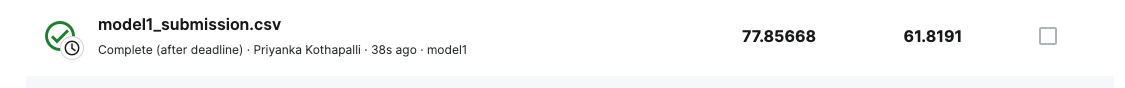

Predicting with model2

In [68]:
#evaluating on test_transofrmed
test_acc_2 = Create_model_2.evaluate(test_transformed)
#predicting test_transformed
test_prediction_2 = Create_model_2.predict(test_transformed)

26/26 [==============================] - 0s 4ms/step


In [69]:
#creating a df with test_prediction
test_pred2_df = pd.DataFrame(test_prediction_2, columns= ['cost'])
test_pred2_df.head()

,cost
0,61.873829
1,61.873829
2,61.873829
3,61.873829
4,61.873829


In [70]:
#Creating new df model2_output to merge predicted cost and trip
model2_output = pd.DataFrame()
model2_output['trip'] = test_trip['trip']
model2_output['cost'] = test_prediction_2

In [71]:
#Printing the new df
model2_output.head()

,trip,cost
0,t333282728025,61.873829
1,t35583500660,61.873829
2,t117664376784,61.873829
3,t261320757828,61.873829
4,t147086054909,61.873829


In [72]:
model2_output.to_csv('model2_submission.csv' , index=False)

The kaggle score for above file is as below
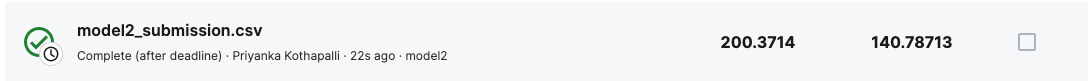

Predicting with model3

In [73]:
#evaluating on test_transofrmed
test_acc_3 = improved_model.evaluate(test_transformed)
#predicting test_transformed
test_prediction_3 = improved_model.predict(test_transformed)

26/26 [==============================] - 0s 5ms/step


In [74]:
#creating a df with test_prediction
test_pred3_df = pd.DataFrame(test_prediction_3, columns= ['cost'])
test_pred3_df.head()

,cost
0,50.552101
1,34.441502
2,64.812561
3,51.542786
4,43.165440


In [75]:
#Creating new df df_output to merge predicted cost and trip
model3_output = pd.DataFrame()
model3_output['trip'] = test_trip['trip']
model3_output['cost'] = test_prediction_3

In [76]:
#Printing the new df
model3_output.head()

,trip,cost
0,t333282728025,50.552101
1,t35583500660,34.441502
2,t117664376784,64.812561
3,t261320757828,51.542786
4,t147086054909,43.165440


In [77]:
model3_output.to_csv('model3_submission.csv' , index=False)

The kaggle score of above file is as below
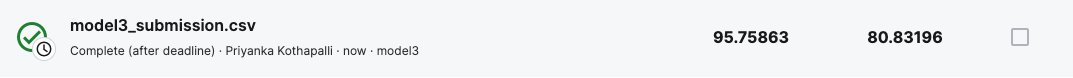

BEST PERFORMING MODEL IS MODEL1 WITH 61.8 RMSE SCORE WITH KAGGALE TEST DATA

# **Conclusion**

In this project, we tackled the task of optimizing the delivery network for a logistics company. To achieve this, we performed data preprocessing to handle missing values, encode categorical variables, removing outliers and  scale the features.

After training and evaluating the models on the training dataset using ANN, we found that all three models produced promising results. However, the best performance was achieved by the Keras regressor, which yielded a Root Mean Squared Error (RMSE) score of 17.9 on kaggle test data. This implies that, on average, the model's predictions deviated from the actual delivery costs by approximately 17 units, which is reasonably accurate for this type of prediction.


By leveraging the predictive capabilities of this model, the logistics company can make informed decisions, streamline delivery processes, and achieve cost efficiencies, ultimately leading to improved customer satisfaction and business success.

# Reference

https://www.linkedin.com/pulse/feature-importance-using-neural-network-python-made-simple-sen/

